### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Gastos De Deputados
Iremos analisar os gastos dos deputados e partidos brasileiros entre os anos de 2009 e 2019 a partir de dados disponibilizados pelo Governo Federal.

### Escopo Do Projeto
•Neste projeto iremos fazer uma analise feral dos gastos, ou seja, gastos dos partidos, gastos por ano entre outros.

•Assim poderemos ter uma noção de quanto é gasto anualmente por deputados e seus partidos.

### Leitura de todos os dados.

In [2]:
g2008 = pd.read_csv('projeto/Ano-2008.csv',sep = ';')
g2009 = pd.read_csv('projeto/Ano-2009.csv',sep = ';')
g2010 = pd.read_csv('projeto/Ano-2010.csv',sep = ';')
g2011 = pd.read_csv('projeto/Ano-2011.csv',sep = ';')
g2012 = pd.read_csv('projeto/Ano-2012.csv',sep = ';')
g2013 = pd.read_csv('projeto/Ano-2013.csv',sep = ';')
g2014 = pd.read_csv('projeto/Ano-2014.csv',sep = ';')
g2015 = pd.read_csv('projeto/Ano-2015.csv',sep = ';')
g2016 = pd.read_csv('projeto/Ano-2016.csv',sep = ';')
g2017 = pd.read_csv('projeto/Ano-2017.csv',sep = ';')
g2018 = pd.read_csv('projeto/Ano-2018.csv',sep = ';')
g2019 = pd.read_csv('projeto/Ano-2019.csv',sep = ';')

In [3]:
#Concatenando e filtrando somente os dados necessários.
gAll = pd.concat([g2008,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,g2019], sort = False)

In [4]:
filt = gAll.iloc[0:,[0,5,6,9,12,19,20,21]]

In [5]:
filt

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,txtFornecedor,vlrLiquido,numMes,numAno
0,JOSEPH BANDEIRA,BA,PT,"LOCOMOÇÃO, ALIMENTAÇÃO E HOSPEDAGEM",NACIONAL TRANSPORTES E LOGISTICA,3800.00,6,2008
1,JOSEPH BANDEIRA,BA,PT,"LOCOMOÇÃO, ALIMENTAÇÃO E HOSPEDAGEM",NTL - NACIONAL TRANSPORTES E LOGISTICA,6000.00,9,2008
2,SILVIO COSTA,PE,PTB,TELEFONIA,IMÓVEL FUNCIONAL,80.01,12,2008
3,ALDO REBELO,SP,PCdoB,TELEFONIA,IMÓVEL FUNCIONAL,372.55,12,2008
4,ANTONIO CARLOS PANNUNZIO,SP,PSDB,TELEFONIA,IMÓVEL FUNCIONAL,38.48,3,2008
...,...,...,...,...,...,...,...,...
145818,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,609.39,4,2019
145819,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,468.39,4,2019
145820,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,1000.39,4,2019
145821,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,209.00,4,2019


### Removendo os dados faltosos da coluna dos "Partidos".

In [6]:
filt.update(filt['sgPartido'].fillna('test'))
filt

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,txtFornecedor,vlrLiquido,numMes,numAno
0,JOSEPH BANDEIRA,BA,PT,"LOCOMOÇÃO, ALIMENTAÇÃO E HOSPEDAGEM",NACIONAL TRANSPORTES E LOGISTICA,3800.00,6,2008
1,JOSEPH BANDEIRA,BA,PT,"LOCOMOÇÃO, ALIMENTAÇÃO E HOSPEDAGEM",NTL - NACIONAL TRANSPORTES E LOGISTICA,6000.00,9,2008
2,SILVIO COSTA,PE,PTB,TELEFONIA,IMÓVEL FUNCIONAL,80.01,12,2008
3,ALDO REBELO,SP,PCdoB,TELEFONIA,IMÓVEL FUNCIONAL,372.55,12,2008
4,ANTONIO CARLOS PANNUNZIO,SP,PSDB,TELEFONIA,IMÓVEL FUNCIONAL,38.48,3,2008
...,...,...,...,...,...,...,...,...
145818,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,609.39,4,2019
145819,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,468.39,4,2019
145820,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,1000.39,4,2019
145821,JOSEILDO RAMOS,BA,PT,Emissão Bilhete Aéreo,Cia Aérea - TAM,209.00,4,2019


### Coletando todos os partidos dos e adicionando a uma lista.

In [7]:
partidos = []
for x in filt['sgPartido']:
    check = True
    for y in range(len(partidos)):
        if x == partidos[y]:
            check = False
    if (check == True):
        partidos.append(x)

#### Separando por partidos.

In [8]:
a = filt.groupby([filt['sgPartido']])
a.first()

,txNomeParlamentar,sgUF,txtDescricao,txtFornecedor,vlrLiquido,numMes,numAno
sgPartido,,,,,,,
AVANTE,LUIS TIBÉ,MG,TELEFONIA,TNL PCS S.A,306.03,1,2011
CIDADANIA,RUBENS BUENO,PR,PASSAGENS AÉREAS,GOL LINHAS AÉREAS INTELIGENTES,368.62,1,2011
DEM,JORGE TADEU MUDALEN,SP,TELEFONIA,IMÓVEL FUNCIONAL,22.85,12,2008
MDB,MARIA HELENA,RR,TELEFONIA,CELULAR FUNCIONAL,135.74,2,2011
NOVO,MARCEL VAN HATTEM,RS,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,BELLER COMERCIO DE PAPEIS LTDA,37.71,4,2019
PATRI,ERIVELTON SANTANA,BA,PASSAGENS AÉREAS,TAM LINHAS AREAS S/A,372.72,1,2011
PATRIOTA,PASTOR EURICO,PE,PASSAGENS AÉREAS,TAM - LINHAS AÉREAS S/A,846.00,1,2011
PCdoB,ALDO REBELO,SP,TELEFONIA,IMÓVEL FUNCIONAL,372.55,12,2008
PDT,JOSÉ CARLOS ARAÚJO,BA,TELEFONIA,IMÓVEL FUNCIONAL,142.88,12,2008


#### Total Gasto em todos os Anos.

In [9]:
filt['vlrLiquido'].sum()

1978224588.5799997

#### Total Gasto em todos os anos separadamente.

In [15]:
total2008 = g2008['vlrLiquido'].sum()
total2009 = g2009['vlrLiquido'].sum()
total2010 = g2010['vlrLiquido'].sum()
total2011 = g2011['vlrLiquido'].sum()
total2012 = g2012['vlrLiquido'].sum()
total2013 = g2013['vlrLiquido'].sum()
total2014 = g2014['vlrLiquido'].sum()
total2015 = g2015['vlrLiquido'].sum()
total2016 = g2016['vlrLiquido'].sum()
total2017 = g2017['vlrLiquido'].sum()
total2018 = g2018['vlrLiquido'].sum()
total2019 = g2019['vlrLiquido'].sum()
dic = {'2008':total2008,'2009':total2009,'2010':total2010,'2011':total2011,'2012':total2012,'2013':total2013,'2014':total2014,'2015':total2015,'2016':total2016,'2017':total2017,'2018':total2018,'2019':total2019}
dic

df = pd.DataFrame({'Gastos': [total2009, total2010, total2011, total2012,total2013,total2014,total2015,total2016,total2017,total2018,total2019]},
 index=['2009','2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019'])

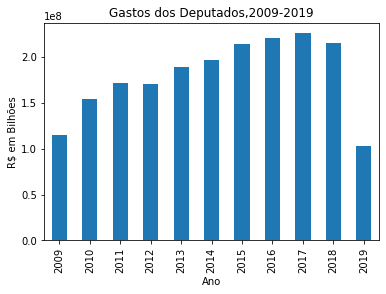

In [12]:
plt.title('Gastos dos Deputados,2009-2019')
plt.xlabel('Ano')
plt.ylabel('R$ em Bilhões')
df['Gastos'].plot.bar()

###### Podemos notar que de 2009 ate 2017 os gastos aumentarão significadamente e em 2018 houve um pouco menos de gastos.
Obs: Os gastos de 2019 estão incompletos.

### Gastos mensais.

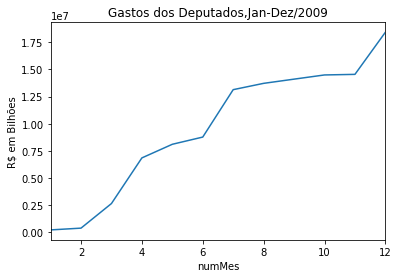

In [24]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2009 = g2009.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2009.plot()

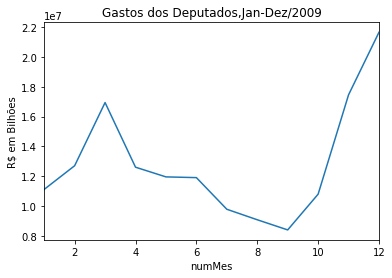

In [25]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2010 = g2010.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2010.plot()

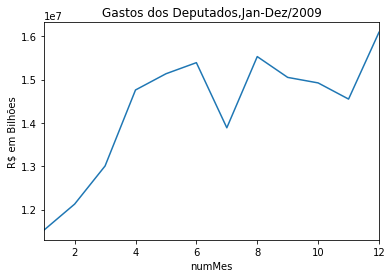

In [27]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2011 = g2011.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2011.plot()

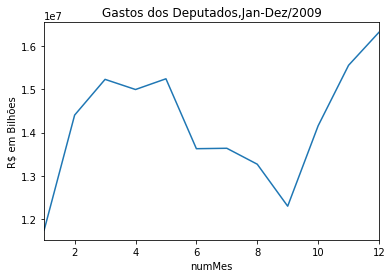

In [28]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2012 = g2012.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2012.plot()

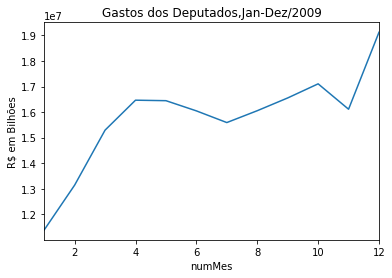

In [29]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2013 = g2013.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2013.plot()

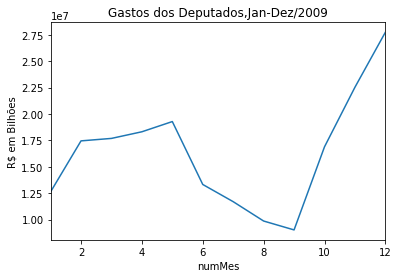

In [30]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2014 = g2014.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2014.plot()

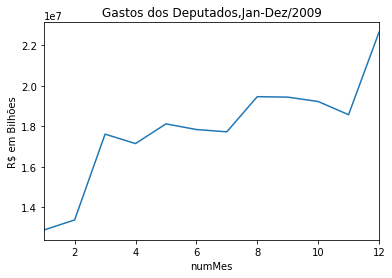

In [31]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2015 = g2015.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2015.plot()

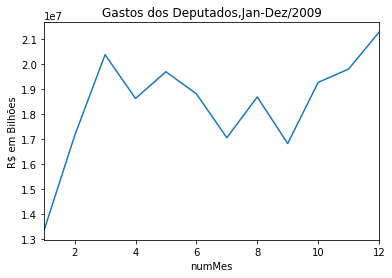

In [32]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2016 = g2016.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2016.plot()

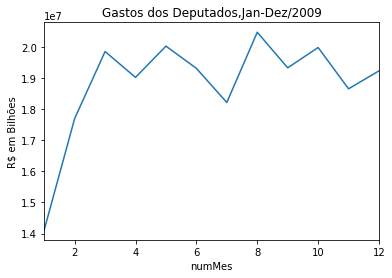

In [33]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2017 = g2017.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2017.plot()

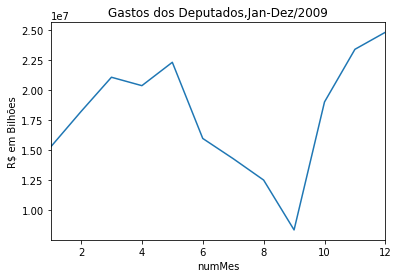

In [34]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2018 = g2018.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2018.plot()

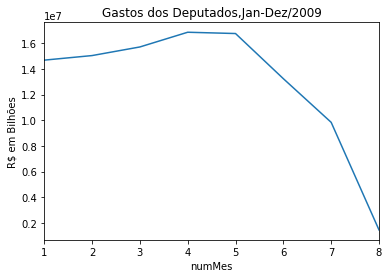

In [35]:
plt.title('Gastos dos Deputados,Jan-Dez/2009')
plt.xlabel('Mês')
plt.ylabel('R$ em Bilhões')
soma_mes2019 = g2019.groupby(['numMes']).sum()['vlrLiquido']
soma_mes2019.plot()

#### •Podemos notar que geralmente no fim do ano(Outubro - Dezembro), os gastos chegam ao seus valores máximos, e que no meio do ano(Abril - Agosto) os gastos tem uma redução em relação aos outros meses.

### Dados sobre com o que mais foi gasto em cada ano.

In [36]:
g2008['txtDescricao'].value_counts().index[0]

'TELEFONIA'

In [37]:
g2009['txtDescricao'].value_counts().index[0]

'COMBUSTÍVEIS E LUBRIFICANTES.'

In [38]:
g2010['txtDescricao'].value_counts().index[0]

'COMBUSTÍVEIS E LUBRIFICANTES.'

In [39]:
g2011['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [40]:
g2012['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [41]:
g2013['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [42]:
g2014['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [43]:
g2015['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [44]:
g2016['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [51]:
g2017['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [53]:
g2018['txtDescricao'].value_counts().index[0]

'Emissão Bilhete Aéreo'

In [47]:
g2019['txtDescricao'].value_counts().index[0]

'COMBUSTÍVEIS E LUBRIFICANTES.'

#### Na maioria dos anos o que mais se provoca gastos são emissões de bilhetes aéreos.